**Introduction** 

In this assignment, you will use various Python libraries to create data visualization. You will work with pandas to import, merge, clean, and analyze the data, then use Matplotlib for data visualization. In class, you worked on a dataset of immigrants to Canada published by the UN. In this lab, you will be working on two datasets from the USA and Canada

**Questions**

1. Look up the 5 countries with the largest number of immigrants to Canada. (Sum the total number of emigrants from 1980 to 2013 coming from each country. Then sort from largest to smallest. )
2. Add a “total” row for each year.
3. Plot all 5 countries with largest emmigrants and total across different years (There will be 6 Lines, 5 for the countries and 1 for the total.)
4. In which year the maximum number of people have immigrated from these 5 countries to Canada? (Total line will show the answer)  Add annotation to the maximum point and name it “Maximum”.
5. Repeat the above steps for USA data (This time use USA data instead of Canada)

**Submission**

Turn in your solution in a notebook file on iCollege by 11:59pm Friday Oct. 22, 2021



In [1]:
#Download the dataset
!pip install gdown
!gdown https://drive.google.com/uc?id=16vZpn51OWRyTPSMmSrwF4HySFEdCVS3d
!gdown https://drive.google.com/uc?id=1NYp-nCPhMZPBEhJ__5znZrHAdGZ6x-T3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=16vZpn51OWRyTPSMmSrwF4HySFEdCVS3d
To: /content/USA.xlsx
100% 244k/244k [00:00<00:00, 76.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NYp-nCPhMZPBEhJ__5znZrHAdGZ6x-T3
To: /content/Canada.xlsx
100% 235k/235k [00:00<00:00, 81.9MB/s]


In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
df_can = pd.read_excel(
    './Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data for Canada read into a pandas dataframe!')

df_usa = pd.read_excel(
    './USA.xlsx',
    sheet_name='USA by Place of birth',
    skiprows=range(20),
    skipfooter=2)
print('Data for USA read into a pandas dataframe!')




Data for Canada read into a pandas dataframe!
Data for USA read into a pandas dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_usa.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,12,15,28,11,14,19,14,D,-,D
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,..,..,..,..,..,..,..,..,..,..


#Canada

In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country'},inplace=True)

In [ ]:
df_can.set_index("Country",inplace=True)

In [9]:
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_can['Total']=df_can.sum(axis=1)
df_can.sort_values('Total', ascending=False, inplace=True)
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [11]:
df_can_top5 = df_can.iloc[:5,:-1]

In [13]:
df_can_top5.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [15]:
df_can_top5.loc['Total']=df_can_top5.sum(numeric_only = True, axis=0)

In [16]:
df_can_top5.head(6)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Total,43077,47041,38525,24678,21870,19255,23437,42601,51612,52587,...,99790,118505,106033,94561,101158,103744,118778,106448,115694,115190


In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
print(df_can_top5.loc['Total'].idxmax(), df_can_top5.loc['Total'].max())

2010 118778


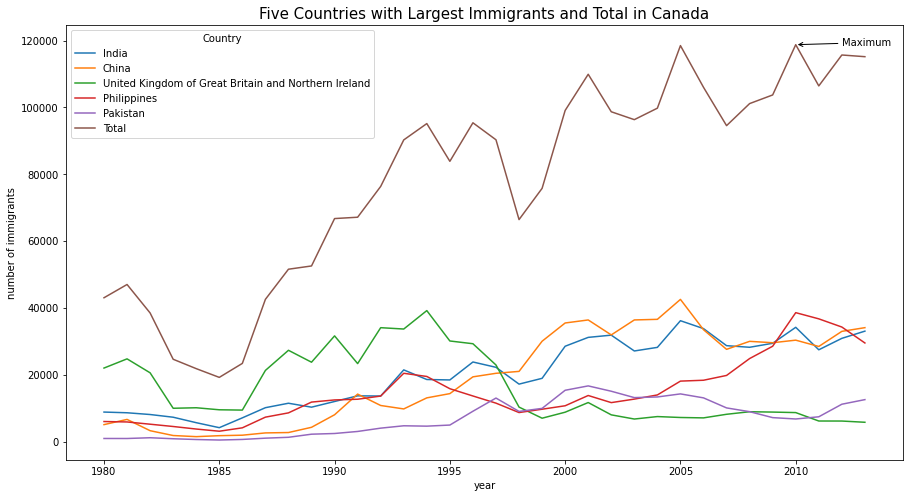

In [19]:
df_can_top5.transpose().plot(figsize=(15,8))
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.title('Five Countries with Largest Immigrants and Total in Canada',
          fontsize = 15)
plt.annotate('Maximum', xy=(2010,118778), xycoords='data',xytext=(2012,118500), arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.show()

#USA

In [20]:
df_usa.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)
df_usa.rename(columns={'OdName':'Country'},inplace=True)

In [21]:
df_usa.set_index("Country",inplace=True)

In [22]:
df_usa

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,722,1881,1569,2566,3222,2794,2831,2424,2873,3232,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
Albania,30,11,23,22,32,45,53,62,82,71,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
Algeria,175,184,190,201,197,202,183,172,199,230,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
American Samoa,0,0,7,7,0,0,0,1,0,..,...,12,15,28,11,14,19,14,D,-,D
Andorra,2,3,2,1,0,0,1,0,0,4,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0,0,0,0,...,..,..,..,..,..,..,..,..,..,..
Western Sahara,0,1,1,2,0,0,0,0,1,0,...,..,..,..,..,..,..,..,..,..,..
Yemen,160,230,305,268,324,432,420,577,360,831,...,1760,3366,4308,2396,1872,3134,3591,3361,2620,3532


In [23]:
years = list(range(1980,2013))

In [24]:
df_usa[years]=df_usa[years].apply(pd.to_numeric,errors='coerce')

In [29]:
df_usa['Total']=df_usa[years].sum(axis=1)

In [30]:
df_usa

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,722.0,1881.0,1569.0,2566.0,3222.0,2794.0,2831.0,2424.0,2873.0,3232.0,...,4749.0,3417.0,1753.0,2813.0,3165.0,2017.0,1648.0,1617.0,2196,72234.0
Albania,30.0,11.0,23.0,22.0,32.0,45.0,53.0,62.0,82.0,71.0,...,5947.0,7914.0,5737.0,5754.0,5137.0,4711.0,3612.0,3364.0,3186,84194.0
Algeria,175.0,184.0,190.0,201.0,197.0,202.0,183.0,172.0,199.0,230.0,...,1115.0,1300.0,1036.0,1037.0,1485.0,1305.0,1364.0,1369.0,1241,22040.0
American Samoa,0.0,0.0,7.0,7.0,0.0,0.0,0.0,1.0,0.0,NaN,...,15.0,28.0,11.0,14.0,19.0,14.0,NaN,NaN,D,220.0
Andorra,2.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,15.0
Western Sahara,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,5.0
Yemen,160.0,230.0,305.0,268.0,324.0,432.0,420.0,577.0,360.0,831.0,...,3366.0,4308.0,2396.0,1872.0,3134.0,3591.0,3361.0,2620.0,3532,52572.0


In [32]:
df_usa.sort_values('Total', ascending=False, inplace=True)
df_usa.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,56680.0,101268.0,56106.0,59079.0,57557.0,61077.0,66533.0,72351.0,95039.0,405172.0,...,161445.0,173749.0,148640.0,189989.0,164920.0,139120.0,143446.0,146406.0,135028,5943520.0
Philippines,42316.0,43772.0,45102.0,41546.0,42768.0,47978.0,52558.0,50060.0,50697.0,57034.0,...,60746.0,74606.0,72596.0,54030.0,60029.0,58173.0,57011.0,57327.0,54446,1744426.0
China,27651.0,25803.0,27100.0,25777.0,23363.0,24787.0,25106.0,25841.0,28717.0,32272.0,...,69933.0,87307.0,76655.0,80271.0,64238.0,70863.0,87016.0,81784.0,71798,1554114.0
India,22607.0,21522.0,21738.0,25451.0,24964.0,26026.0,26227.0,27803.0,26268.0,31175.0,...,84680.0,61369.0,65353.0,63352.0,57304.0,69162.0,69013.0,66434.0,68458,1465318.0
Viet Nam,43483.0,55631.0,72553.0,37560.0,37236.0,31895.0,29993.0,24231.0,25789.0,37739.0,...,32784.0,30691.0,28691.0,31497.0,29234.0,30632.0,34157.0,28304.0,27101,1234325.0


In [33]:
usa_top5 = df_usa.iloc[:5,:-1]

In [34]:
usa_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,56680.0,101268.0,56106.0,59079.0,57557.0,61077.0,66533.0,72351.0,95039.0,405172.0,...,175411.0,161445.0,173749.0,148640.0,189989.0,164920.0,139120.0,143446.0,146406.0,135028
Philippines,42316.0,43772.0,45102.0,41546.0,42768.0,47978.0,52558.0,50060.0,50697.0,57034.0,...,57846.0,60746.0,74606.0,72596.0,54030.0,60029.0,58173.0,57011.0,57327.0,54446
China,27651.0,25803.0,27100.0,25777.0,23363.0,24787.0,25106.0,25841.0,28717.0,32272.0,...,55494.0,69933.0,87307.0,76655.0,80271.0,64238.0,70863.0,87016.0,81784.0,71798
India,22607.0,21522.0,21738.0,25451.0,24964.0,26026.0,26227.0,27803.0,26268.0,31175.0,...,70151.0,84680.0,61369.0,65353.0,63352.0,57304.0,69162.0,69013.0,66434.0,68458
Viet Nam,43483.0,55631.0,72553.0,37560.0,37236.0,31895.0,29993.0,24231.0,25789.0,37739.0,...,31524.0,32784.0,30691.0,28691.0,31497.0,29234.0,30632.0,34157.0,28304.0,27101


In [35]:
usa_top5.loc['Total']=usa_top5.sum(numeric_only = True, axis=0)

In [36]:
usa_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,56680.0,101268.0,56106.0,59079.0,57557.0,61077.0,66533.0,72351.0,95039.0,405172.0,...,175411.0,161445.0,173749.0,148640.0,189989.0,164920.0,139120.0,143446.0,146406.0,135028
Philippines,42316.0,43772.0,45102.0,41546.0,42768.0,47978.0,52558.0,50060.0,50697.0,57034.0,...,57846.0,60746.0,74606.0,72596.0,54030.0,60029.0,58173.0,57011.0,57327.0,54446
China,27651.0,25803.0,27100.0,25777.0,23363.0,24787.0,25106.0,25841.0,28717.0,32272.0,...,55494.0,69933.0,87307.0,76655.0,80271.0,64238.0,70863.0,87016.0,81784.0,71798
India,22607.0,21522.0,21738.0,25451.0,24964.0,26026.0,26227.0,27803.0,26268.0,31175.0,...,70151.0,84680.0,61369.0,65353.0,63352.0,57304.0,69162.0,69013.0,66434.0,68458
Viet Nam,43483.0,55631.0,72553.0,37560.0,37236.0,31895.0,29993.0,24231.0,25789.0,37739.0,...,31524.0,32784.0,30691.0,28691.0,31497.0,29234.0,30632.0,34157.0,28304.0,27101
Total,192737.0,247996.0,222599.0,189413.0,185888.0,191763.0,200417.0,200286.0,226510.0,563392.0,...,390426.0,409588.0,427722.0,391935.0,419139.0,375725.0,367950.0,390643.0,380255.0,NaN


In [43]:
print(usa_top5.loc['Total'].astype('float64').idxmax(), usa_top5.loc['Total'].max())

1991 1143159.0


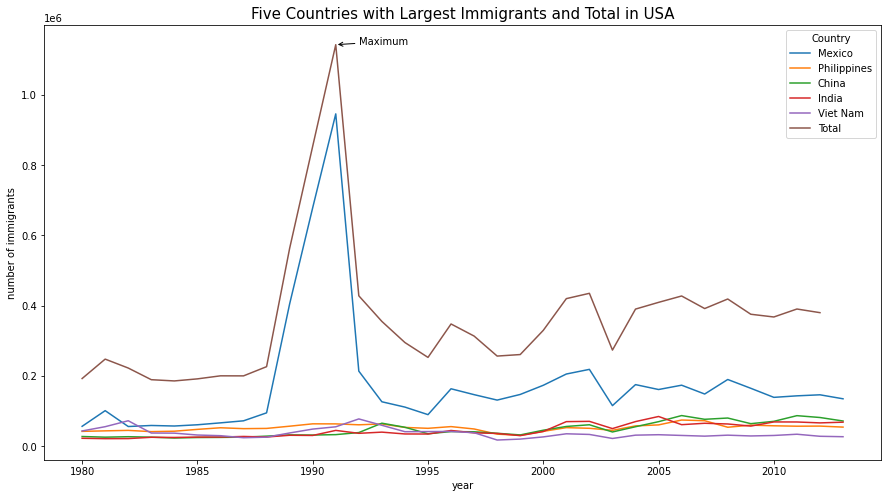

In [44]:
usa_top5.transpose().plot(figsize=(15,8))
plt.ylabel('number of immigrants')
plt.xlabel('year')
plt.title('Five Countries with Largest Immigrants and Total in USA',
          fontsize = 15)
plt.annotate('Maximum', xy=(1991,1143159), xycoords='data',xytext=(1992,1143159), arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.show()